In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [28]:
def cleanUp(df):
    df['annual_gdp']=df[' gdp_for_year ($) '].str.replace(',','')
    
    df=df.drop([' gdp_for_year ($) ','country-year', 'suicides/100k pop'], axis=1)
    df['annual_gdp']=df['annual_gdp'].astype(int)
    
    countrySer=df.groupby('country')["HDI for year"].mean()
    def HDIcleanup(data):
        country=data[0]
        HDI=data[1]
        if np.isnan(HDI):       
            return countrySer[country]
        else:
            return HDI
    df['HDI_for_year']=df[['country','HDI for year']].apply(HDIcleanup,axis=1)
    df=df.drop('HDI for year', axis=1)
    df=df.dropna()
    y=df['suicides_no']
    df=df.drop('suicides_no',axis=1)
    return df, y

In [29]:
df= pd.read_csv('master.csv')
#df, y=cleanUp(df)

In [32]:
df=df[['country','year','suicides/100k pop','suicides_no']]

In [4]:
df['suicides']=y

In [33]:
df.head()

,country,year,suicides/100k pop,suicides_no
0,Albania,1987,6.71,21
1,Albania,1987,5.19,16
2,Albania,1987,4.83,14
3,Albania,1987,4.59,1
4,Albania,1987,3.28,9


In [6]:
countries=df.country.value_counts().index.tolist()

In [7]:
#df.groupby('country')['suicides'].sum().index.to

In [8]:
import seaborn as sns

In [9]:
sns.relplot('year','suicides', hue='Country', data=df_yearly_Sums)

NameError: name 'df_yearly_Sums' is not defined

I need to re-write this code so that it will sum up the suicides and the normalized value. Then I should make a sns relplot with x as year, y as normalized suicides and with suicide counts as the size. These plots should also be seperated by country. 

/Users/eyvonnegeordan/anaconda3/envs/Unit2/lib/python3.6/site-packages/pandas/plotting/_core.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


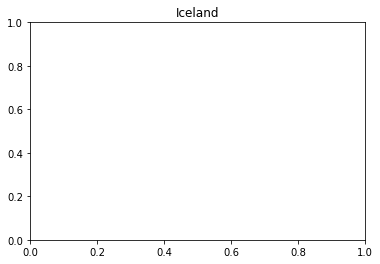

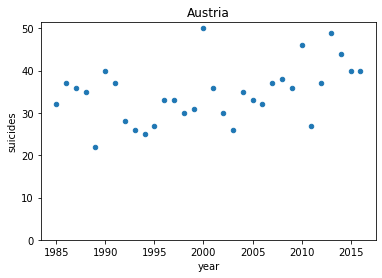

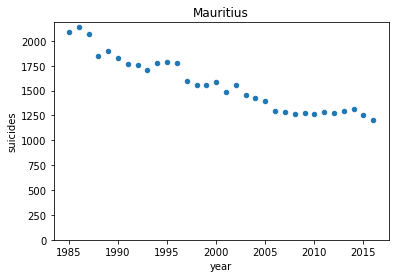

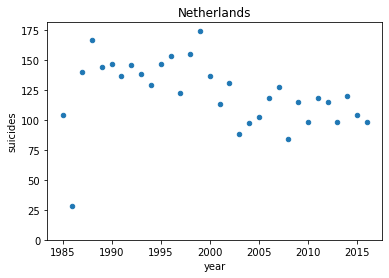

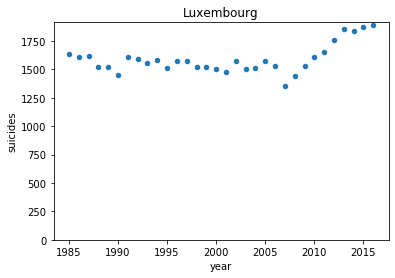

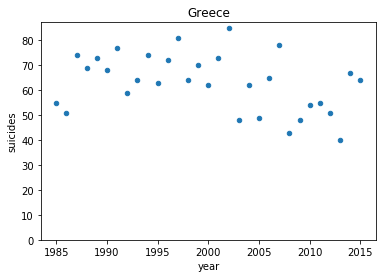

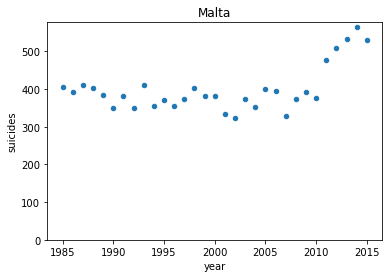

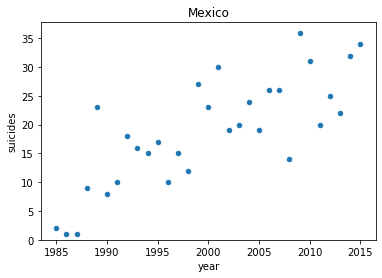

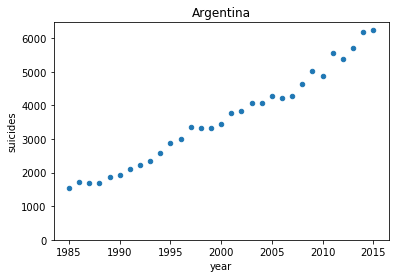

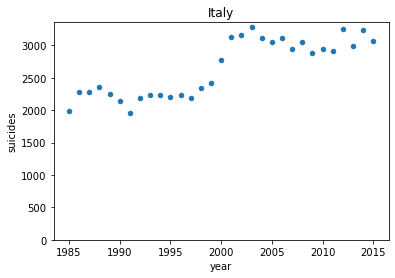

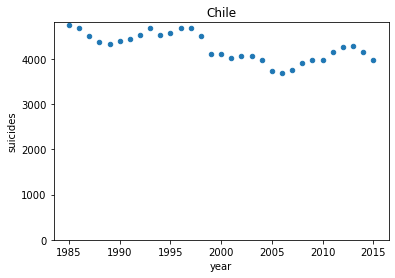

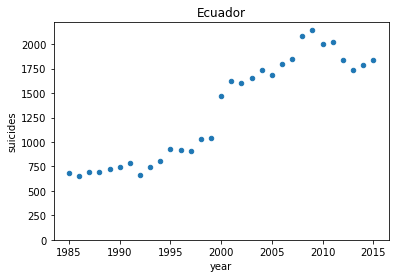

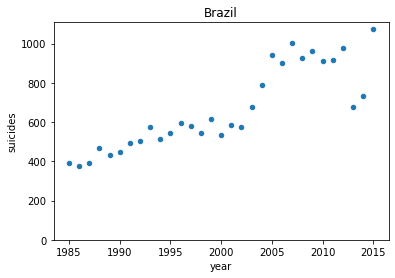

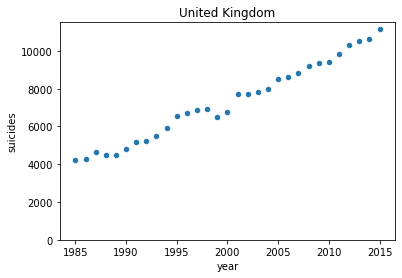

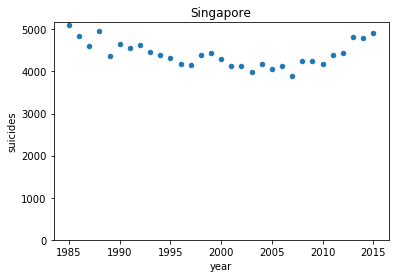

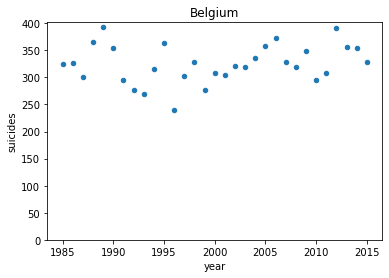

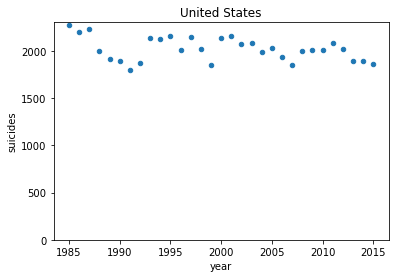

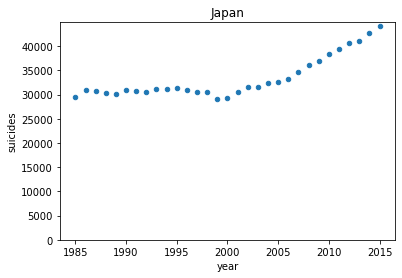

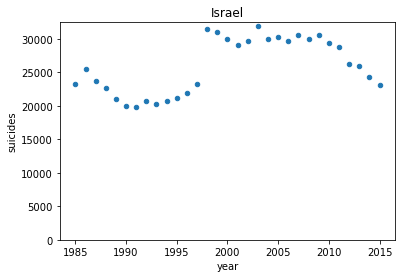

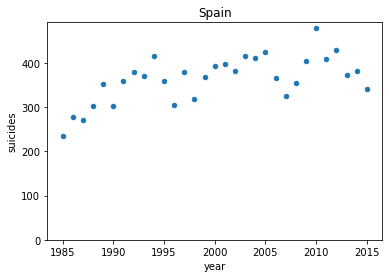

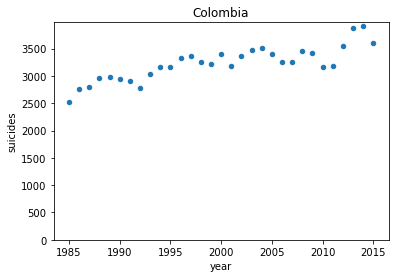

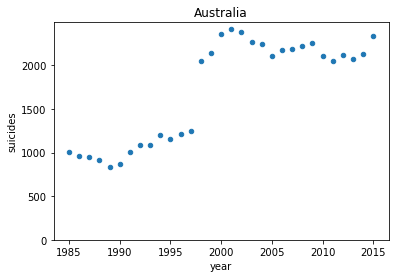

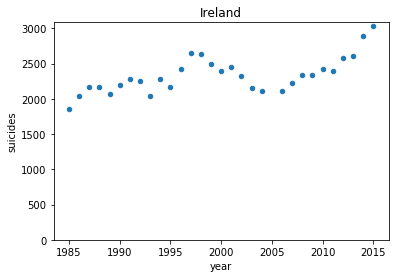

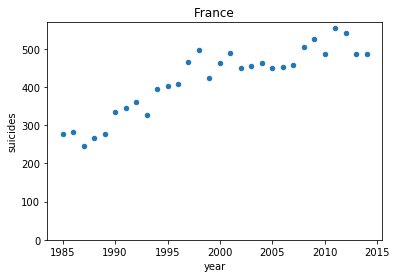

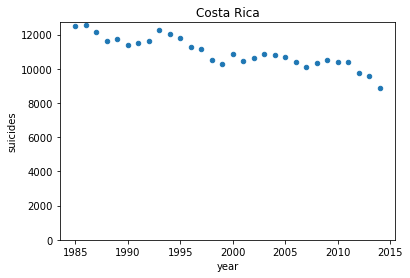

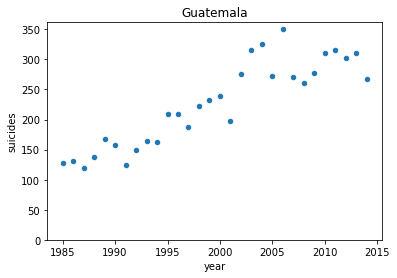

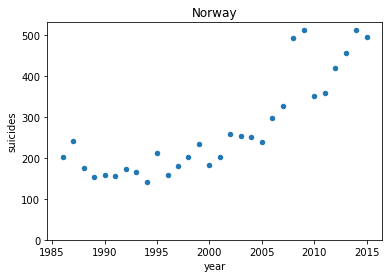

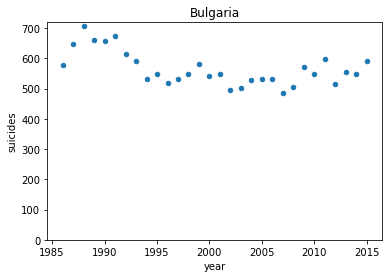

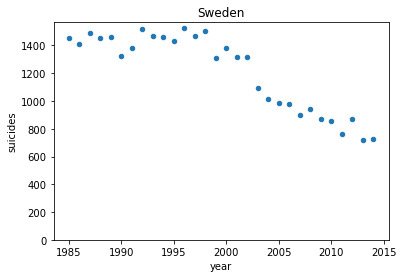

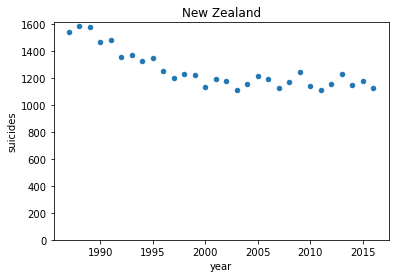

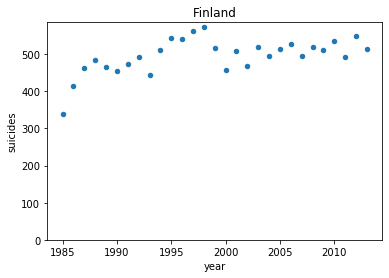

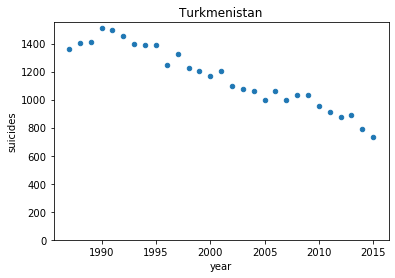

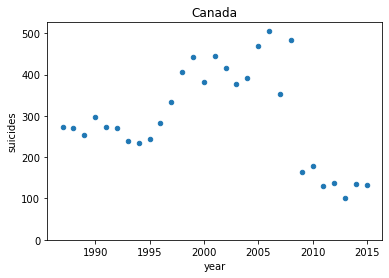

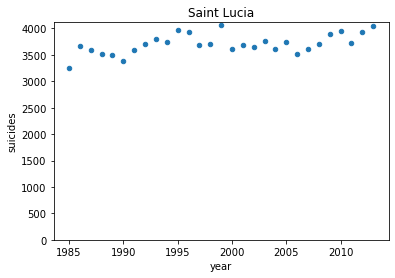

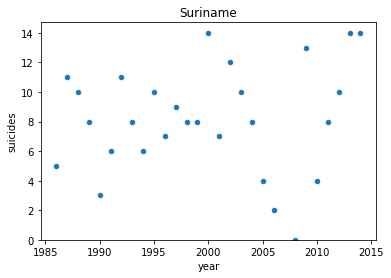

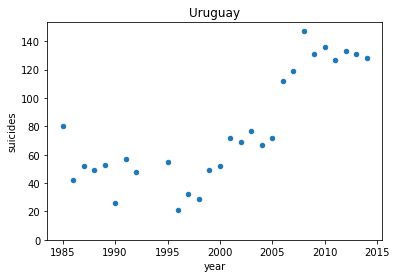

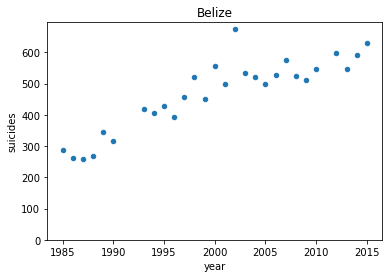

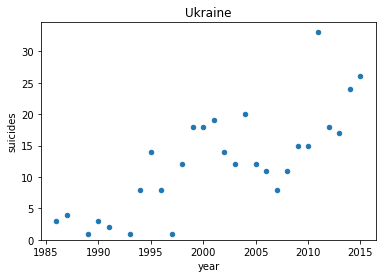

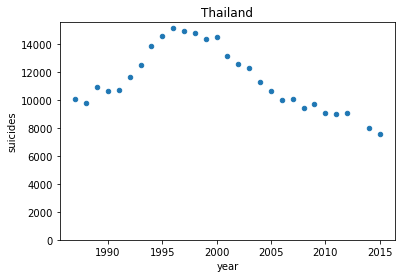

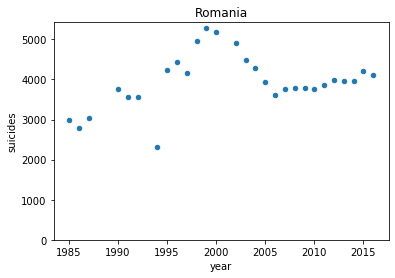

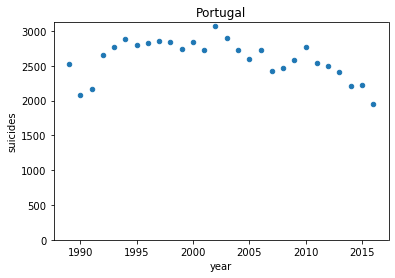

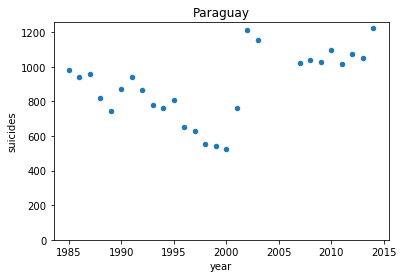

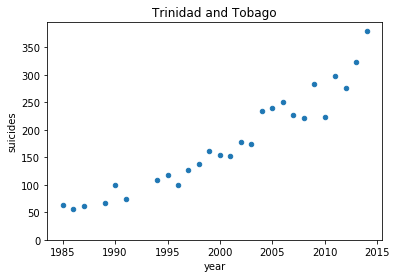

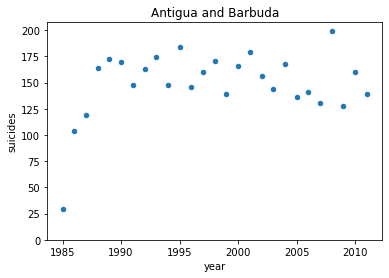

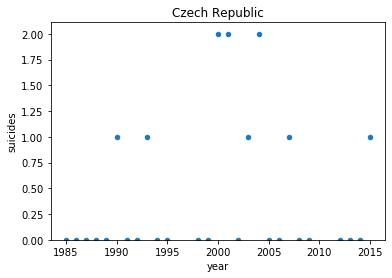

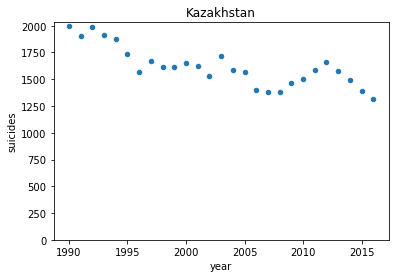

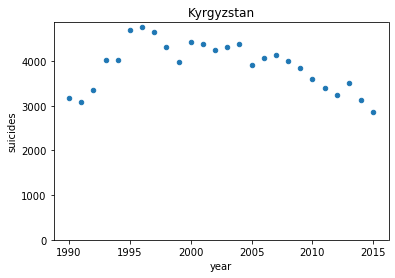

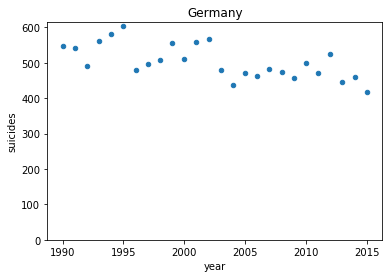

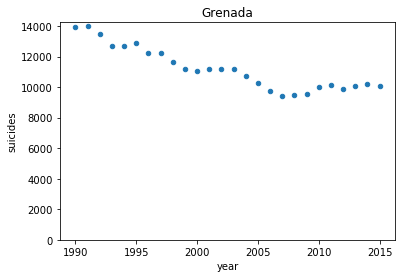

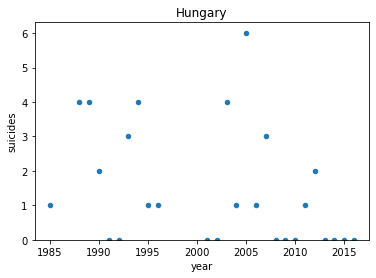

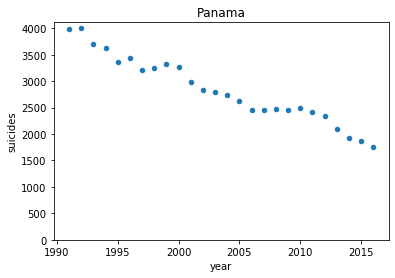

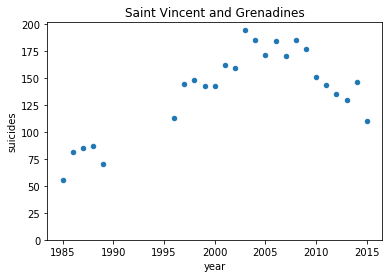

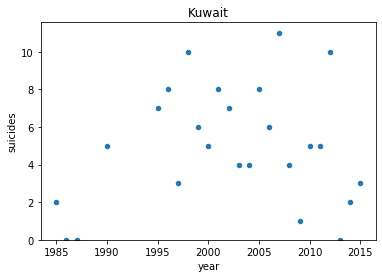

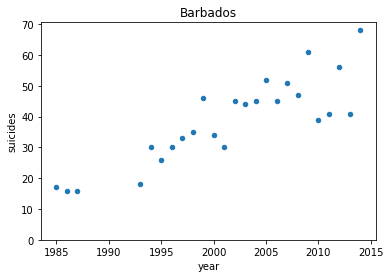

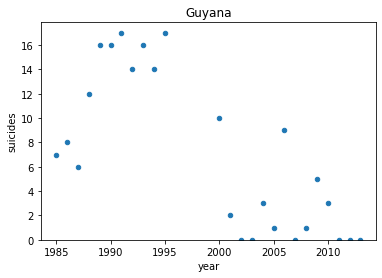

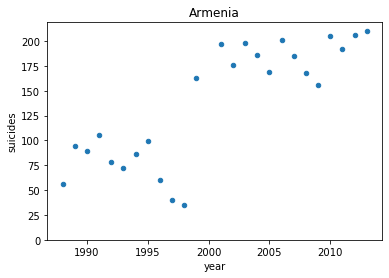

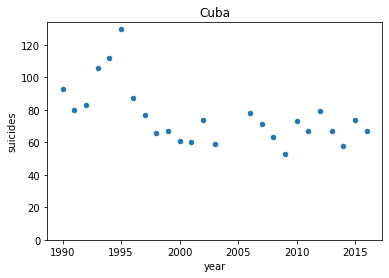

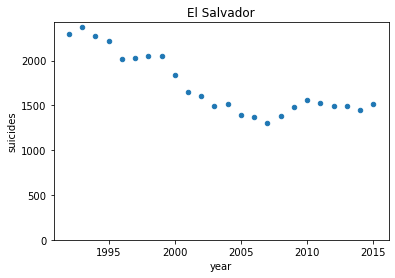

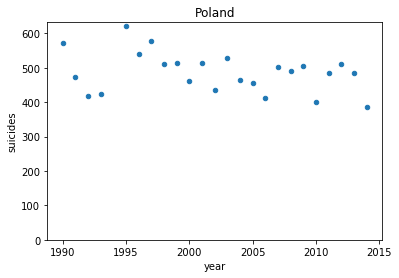

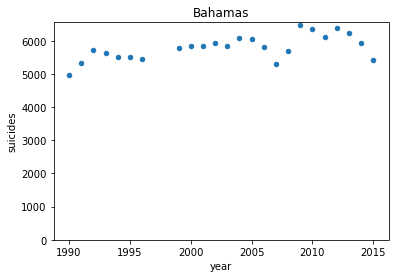

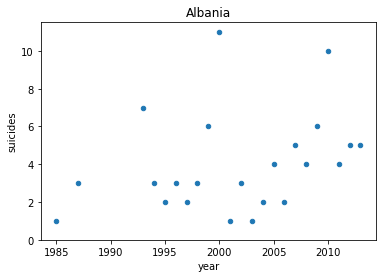

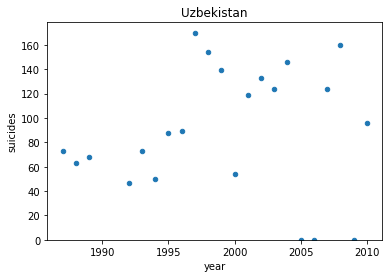

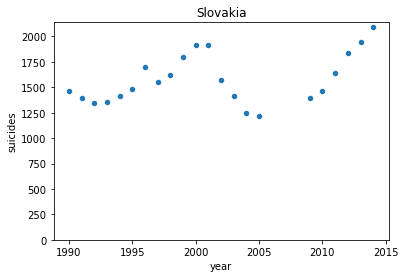

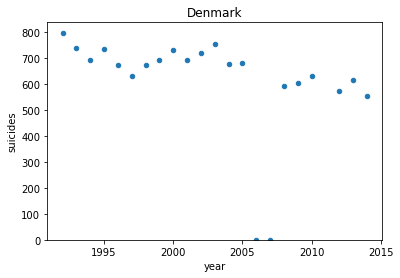

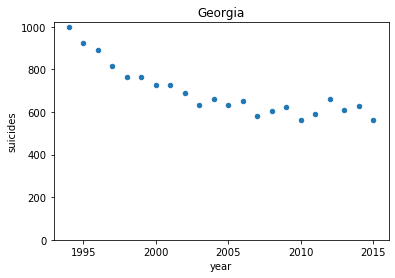

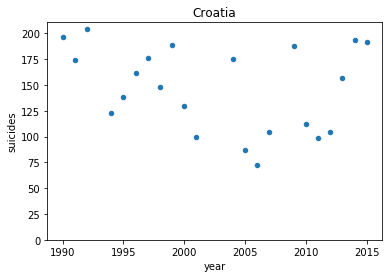

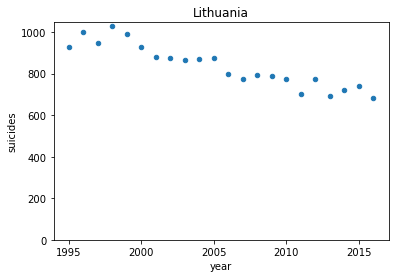

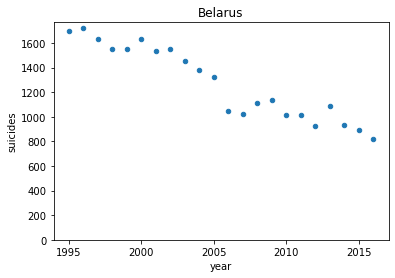

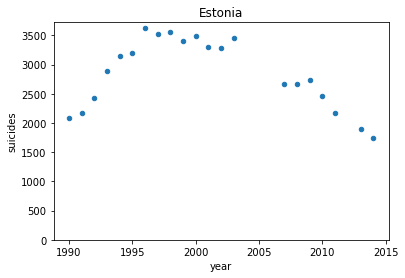

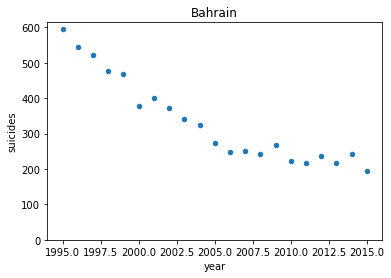

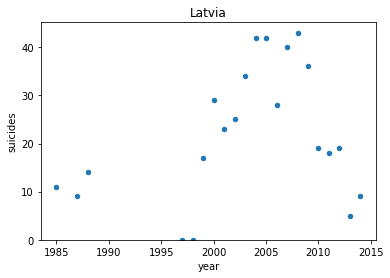

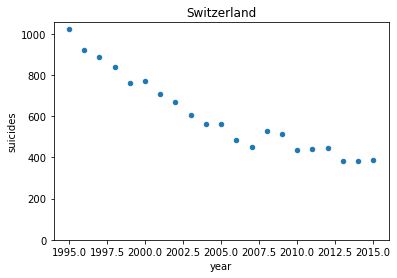

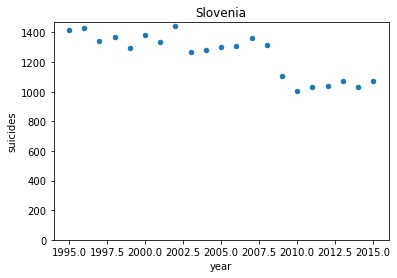

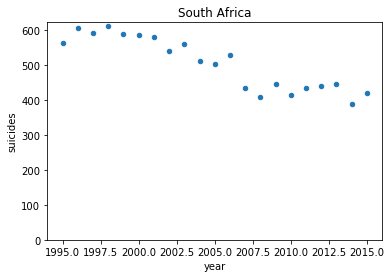

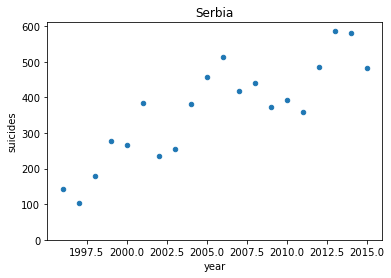

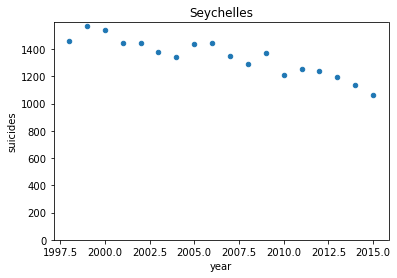

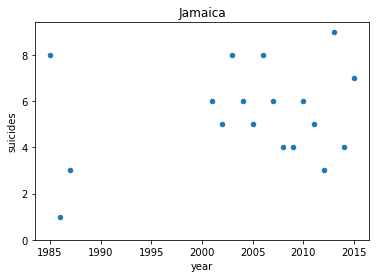

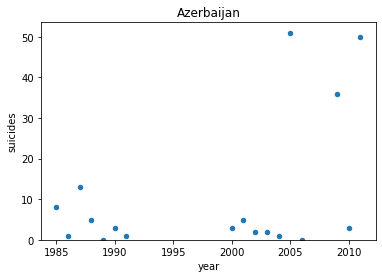

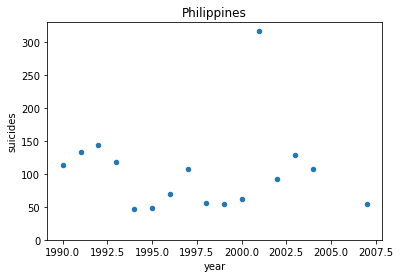

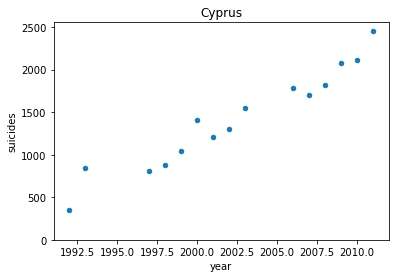

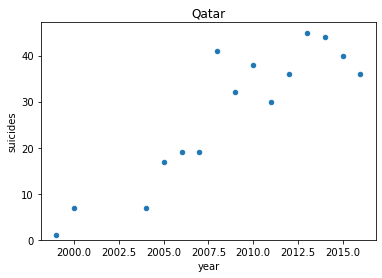

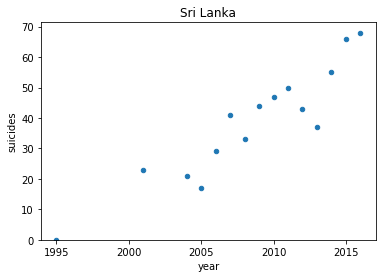

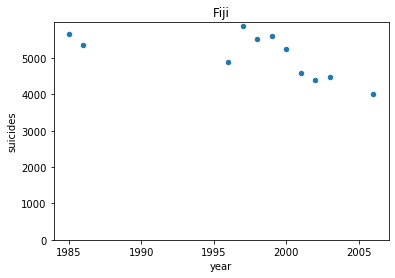

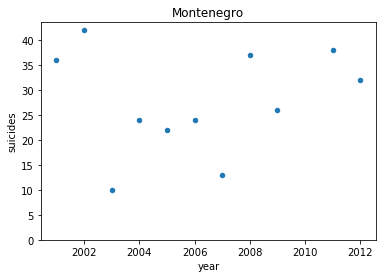

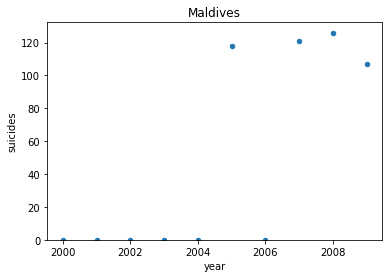

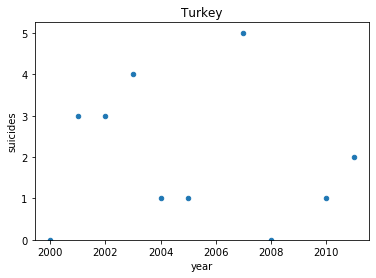

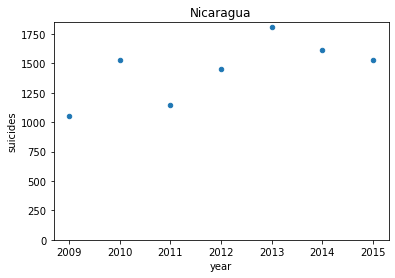

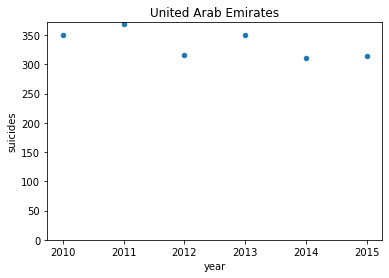

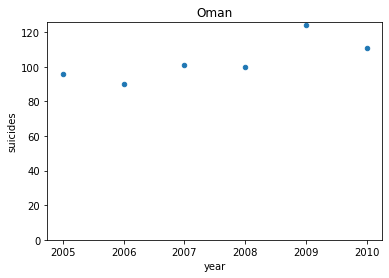

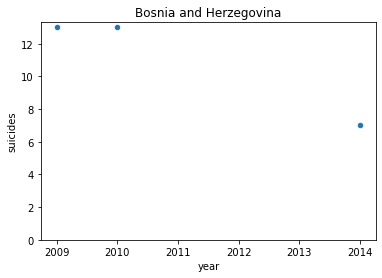

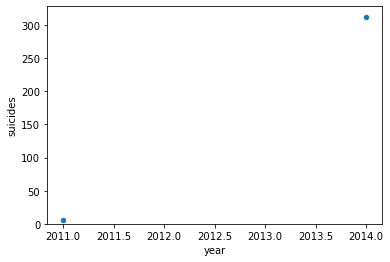

In [10]:
df_yearly_Sums=pd.DataFrame(columns=['Country', 'year','suicides'])
for i, country in enumerate(countries):
    countryDF=df[df['country']==country]
    year_suicide=countryDF.groupby('year')['suicides'].sum()
    year_suicide=year_suicide.reset_index()
    countrylist=[country] * year_suicide.shape[0]
    year_suicide['Country']=countrylist
    df_yearly_Sums=pd.concat([df_yearly_Sums, year_suicide])
    plt.title(country)
    year_suicide.plot(x='year',y='suicides', kind='scatter')
    plt.ylim(0)

In [11]:
import plotly.express as px

### Observations

There is a clear trend for some countries while in others there is no pattern at all. I feel like this would sugest that there is some future leakage that is happening with a random split. I need to re-run my models with a train/test split that is based on time. 

In [12]:
year_suicide.reset_index()

,index,year,suicides,Country
0,0,2011,5,Bosnia and Herzegovina
1,1,2014,313,Bosnia and Herzegovina


In [13]:
len(countrylist)

2

In [14]:
countryDF.shape

(24, 10)

In [15]:
df_yearly_Sums['Country'].value_counts()

Iceland                   32
Austria                   32
Netherlands               32
Mauritius                 32
Luxembourg                31
Colombia                  31
Malta                     31
Italy                     31
Israel                    31
United Kingdom            31
Argentina                 31
Mexico                    31
Brazil                    31
Spain                     31
Singapore                 31
Chile                     31
Greece                    31
Japan                     31
Belgium                   31
Ecuador                   31
United States             31
Norway                    30
Guatemala                 30
Bulgaria                  30
Australia                 30
Sweden                    30
Costa Rica                30
France                    30
Ireland                   30
Canada                    29
                          ..
Slovakia                  22
Croatia                   22
Georgia                   22
Albania       

In [20]:
fig=px.scatter(df_yearly_Sums, x="year", y="suicides", color="Country",
           hover_name="Country", log_x=True, size_max=60)
fig.show()

In [24]:
df_yearly_Sums.to_csv('yearlysums.csv')


In [26]:
df_yearly_Sums.sort_values(by='Country').to_csv('yearlysums.csv')